In [10]:
!pip install pycaret --quiet

import pandas as pd
from pycaret.clustering import *
import warnings
warnings.filterwarnings("ignore")

# Load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(url)

configs = {
    'No Processing': {},
    'Normalization': {'normalize': True},
    'Transformation': {'transformation': True},
    'PCA': {'pca': True},
    'T+N': {'transformation': True, 'normalize': True},
    'T+N+PCA': {'transformation': True, 'normalize': True, 'pca': True}
}

models = ['kmeans', 'hclust', 'meanshift']  # ✅ Fix hierarchical to hclust
cluster_counts = [3, 4, 5]
results = []

for config_name, prep in configs.items():
    for model in models:
        for k in cluster_counts:
            print(f"\n🔧 Running: {model.upper()} | {config_name} | c={k}")
            try:
                setup(data=df,
                      normalize=prep.get('normalize', False),
                      transformation=prep.get('transformation', False),
                      pca=prep.get('pca', False),
                      verbose=False,
                      session_id=123)

                m = create_model(model, num_clusters=k) if model != 'meanshift' else create_model(model)
                metrics = pull()

                silhouette = metrics["Silhouette"].values[0]
                ch_score = metrics["Calinski-Harabasz"].values[0]
                db_score = metrics["Davies-Bouldin"].values[0]

                results.append({
                    'Model': model.upper(),
                    'Preprocessing': config_name,
                    'Clusters': k,
                    'Silhouette': round(silhouette, 4),
                    'Calinski-Harabasz': round(ch_score, 4),
                    'Davies-Bouldin': round(db_score, 4)
                })

            except Exception as e:
                print(f"❌ Error: {e}")
                results.append({
                    'Model': model.upper(),
                    'Preprocessing': config_name,
                    'Clusters': k,
                    'Silhouette': 'NA',
                    'Calinski-Harabasz': 'NA',
                    'Davies-Bouldin': 'NA'
                })

# Final table
results_df = pd.DataFrame(results)
results_df.to_csv("clustering_comparison_results.csv", index=False)
results_df



🔧 Running: KMEANS | No Processing | c=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4563,207.9803,0.9159,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: KMEANS | No Processing | c=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3617,194.8714,0.9530,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: KMEANS | No Processing | c=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3224,169.1429,0.9603,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: HCLUST | No Processing | c=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3750,183.3597,0.9783,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: HCLUST | No Processing | c=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3483,185.2559,0.9701,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: HCLUST | No Processing | c=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3522,196.9540,0.9106,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: MEANSHIFT | No Processing | c=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3644,54.7541,0.5765,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: MEANSHIFT | No Processing | c=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3644,54.7541,0.5765,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: MEANSHIFT | No Processing | c=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3644,54.7541,0.5765,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: KMEANS | Normalization | c=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3063,116.6959,1.2729,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: KMEANS | Normalization | c=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3166,117.7945,0.9666,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: KMEANS | Normalization | c=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3158,117.3087,0.9977,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: HCLUST | Normalization | c=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3600,126.2475,1.1551,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: HCLUST | Normalization | c=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3623,120.7561,0.8255,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: HCLUST | Normalization | c=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3178,123.5061,0.8960,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: MEANSHIFT | Normalization | c=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4054,30.8599,0.4229,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: MEANSHIFT | Normalization | c=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4054,30.8599,0.4229,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: MEANSHIFT | Normalization | c=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4054,30.8599,0.4229,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: KMEANS | Transformation | c=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8554,13039.7633,0.3389,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: KMEANS | Transformation | c=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5181,15162.6315,0.6203,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: KMEANS | Transformation | c=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4728,13314.5833,0.6989,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: HCLUST | Transformation | c=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8554,13039.7633,0.3389,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: HCLUST | Transformation | c=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5109,14291.9587,0.6054,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: HCLUST | Transformation | c=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4530,14101.6445,0.7125,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: MEANSHIFT | Transformation | c=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9076,14114.2429,0.1625,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: MEANSHIFT | Transformation | c=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9076,14114.2429,0.1625,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: MEANSHIFT | Transformation | c=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9076,14114.2429,0.1625,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: KMEANS | PCA | c=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4563,207.9803,0.9159,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: KMEANS | PCA | c=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3617,194.8714,0.9530,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: KMEANS | PCA | c=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3224,169.1429,0.9603,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: HCLUST | PCA | c=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3750,183.3597,0.9783,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: HCLUST | PCA | c=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3483,185.2559,0.9701,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: HCLUST | PCA | c=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3522,196.9540,0.9106,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: MEANSHIFT | PCA | c=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3644,54.7541,0.5765,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: MEANSHIFT | PCA | c=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3644,54.7541,0.5765,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: MEANSHIFT | PCA | c=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3644,54.7541,0.5765,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: KMEANS | T+N | c=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2477,133.7623,1.5943,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: KMEANS | T+N | c=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2168,124.8835,1.6813,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: KMEANS | T+N | c=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2135,120.5274,1.6109,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: HCLUST | T+N | c=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2288,138.5574,1.5189,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: HCLUST | T+N | c=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2425,127.8460,1.4576,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: HCLUST | T+N | c=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2073,112.2108,1.4930,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: MEANSHIFT | T+N | c=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3461,17.4754,1.0571,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: MEANSHIFT | T+N | c=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3461,17.4754,1.0571,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: MEANSHIFT | T+N | c=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3461,17.4754,1.0571,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: KMEANS | T+N+PCA | c=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2477,133.7623,1.5943,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: KMEANS | T+N+PCA | c=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2168,124.8835,1.6813,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: KMEANS | T+N+PCA | c=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2135,120.5274,1.6109,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: HCLUST | T+N+PCA | c=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2288,138.5574,1.5189,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: HCLUST | T+N+PCA | c=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2425,127.8460,1.4576,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: HCLUST | T+N+PCA | c=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2073,112.2108,1.4930,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: MEANSHIFT | T+N+PCA | c=3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3461,17.4754,1.0571,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: MEANSHIFT | T+N+PCA | c=4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3461,17.4754,1.0571,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


🔧 Running: MEANSHIFT | T+N+PCA | c=5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3461,17.4754,1.0571,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Model,Preprocessing,Clusters,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,KMEANS,No Processing,3,0.4563,207.9803,0.9159
1,KMEANS,No Processing,4,0.3617,194.8714,0.9530
2,KMEANS,No Processing,5,0.3224,169.1429,0.9603
3,HCLUST,No Processing,3,0.3750,183.3597,0.9783
4,HCLUST,No Processing,4,0.3483,185.2559,0.9701
5,HCLUST,No Processing,5,0.3522,196.9540,0.9106
6,MEANSHIFT,No Processing,3,0.3644,54.7541,0.5765
7,MEANSHIFT,No Processing,4,0.3644,54.7541,0.5765
8,MEANSHIFT,No Processing,5,0.3644,54.7541,0.5765
9,KMEANS,Normalization,3,0.3063,116.6959,1.2729


<Figure size 1400x600 with 0 Axes>

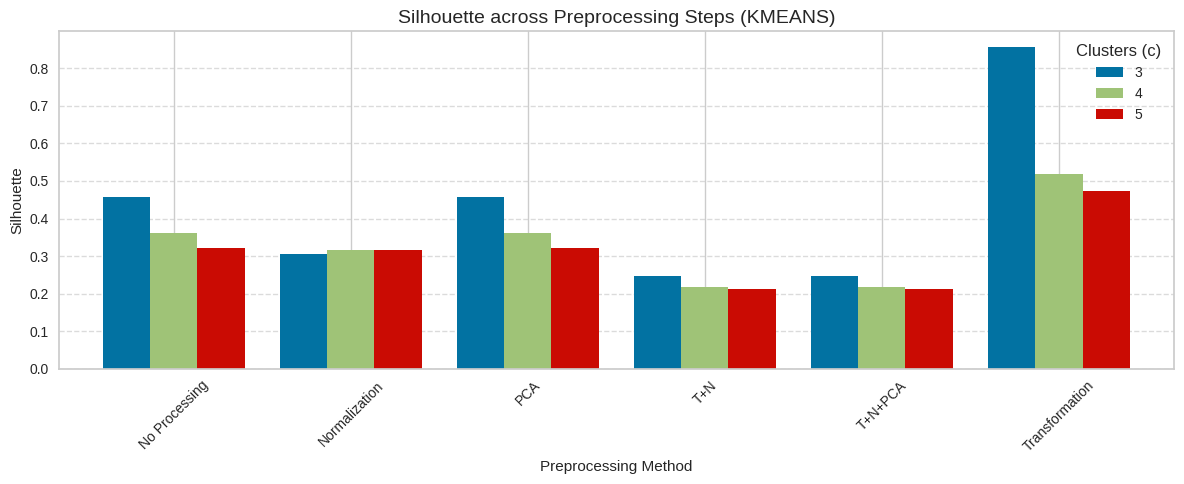

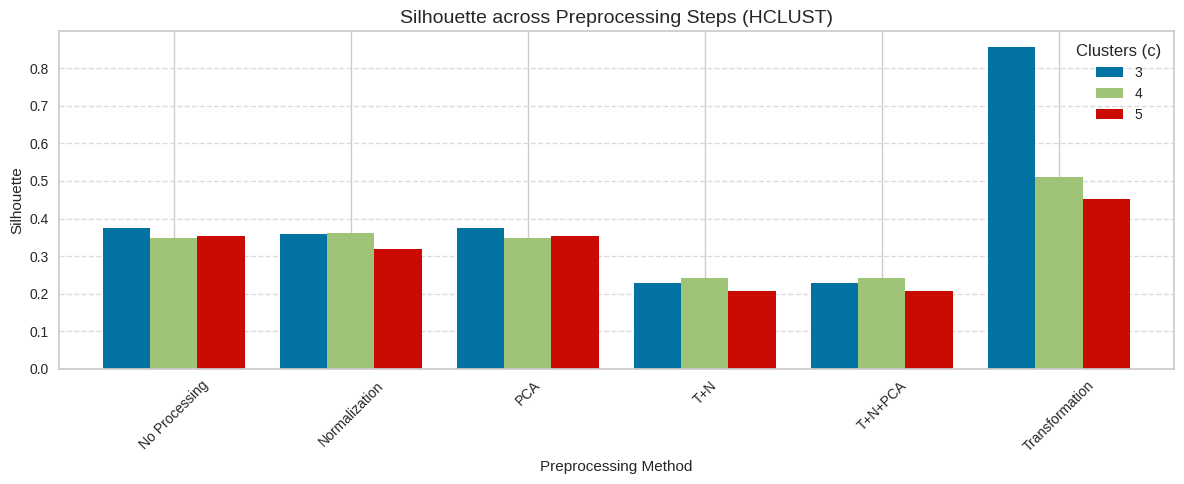

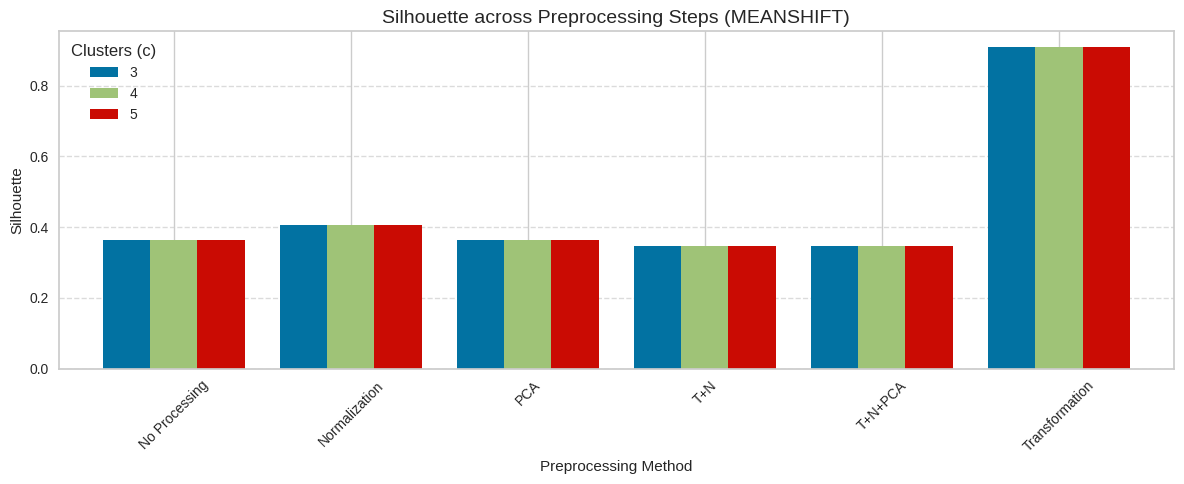

<Figure size 1400x600 with 0 Axes>

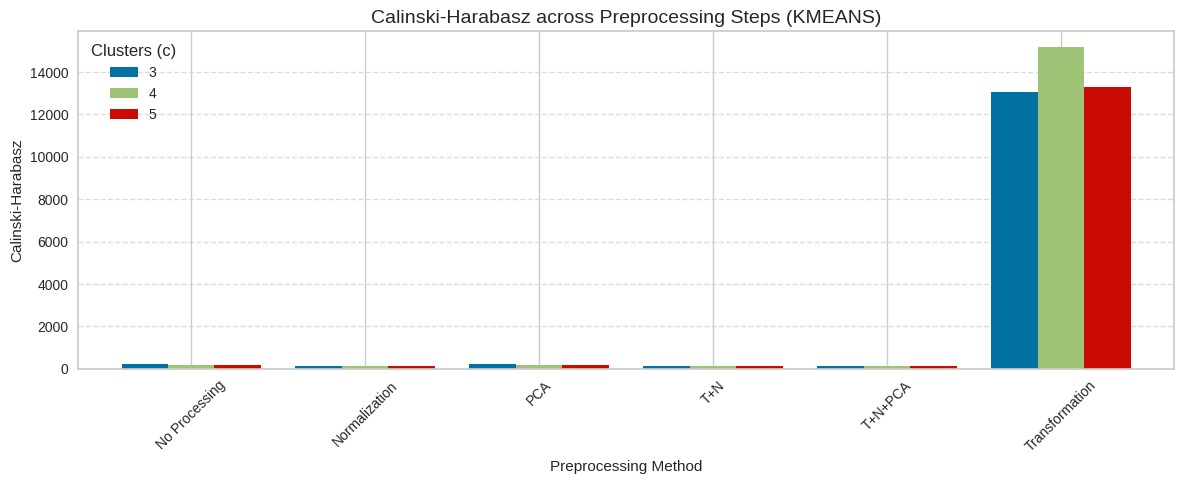

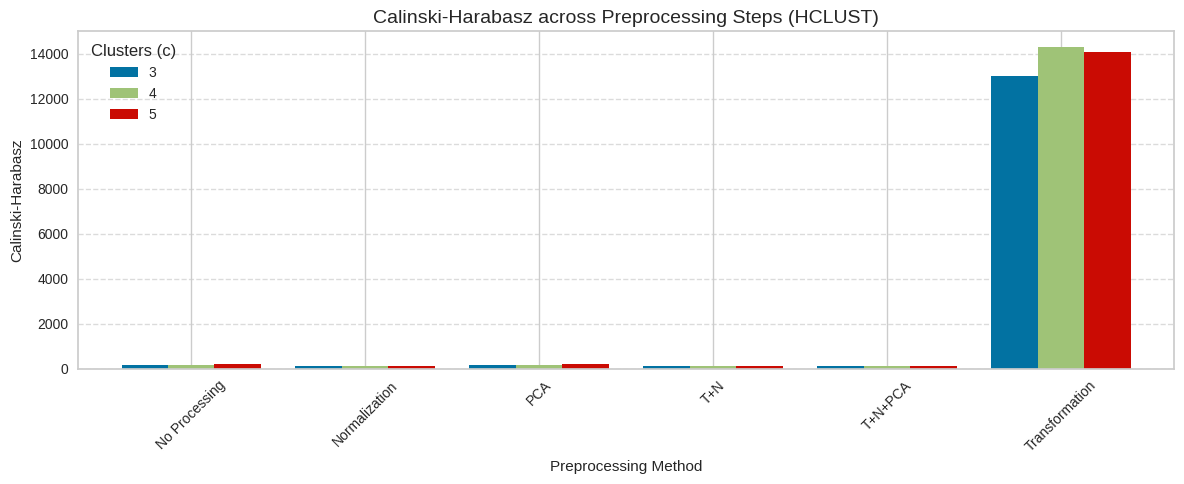

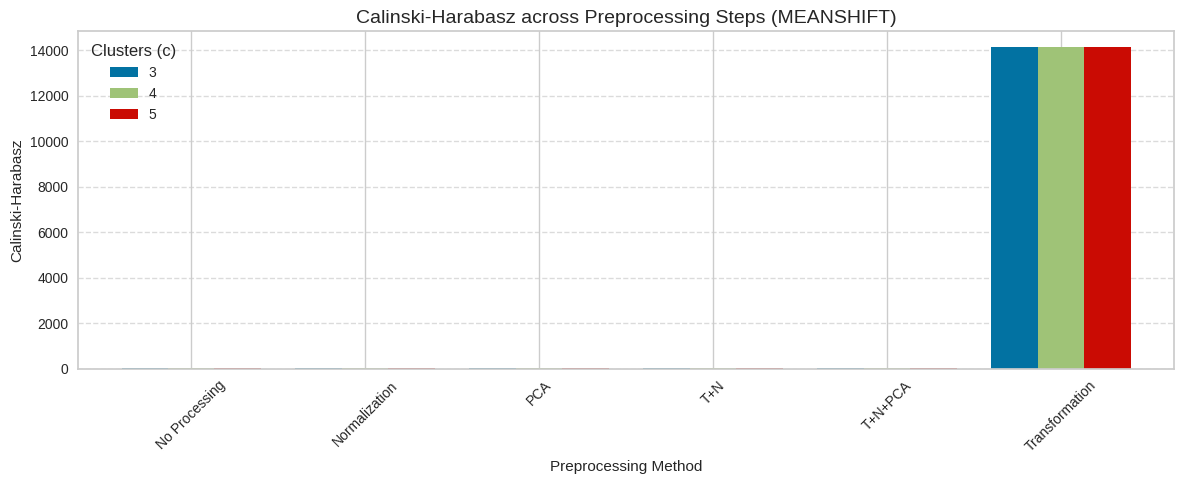

<Figure size 1400x600 with 0 Axes>

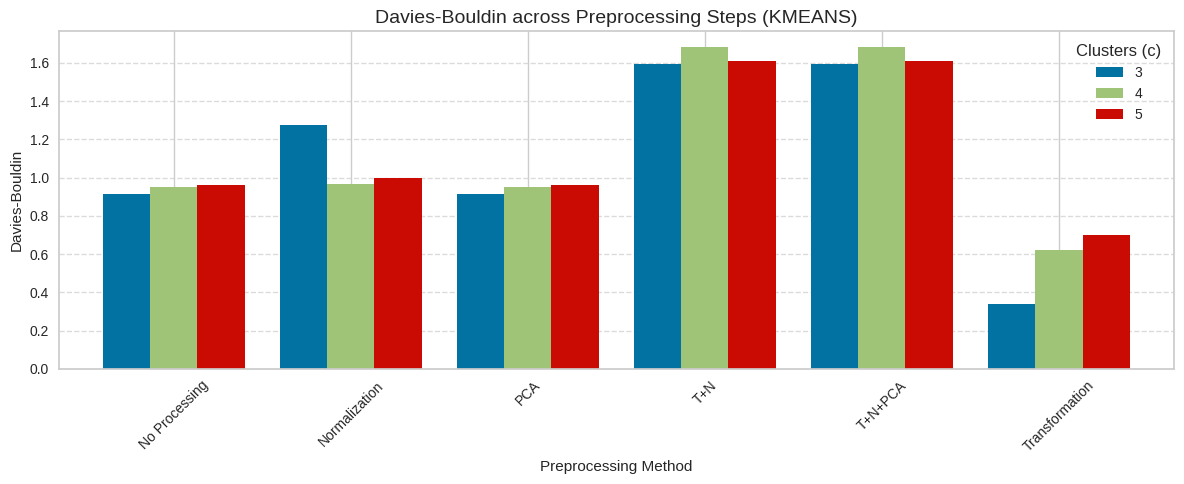

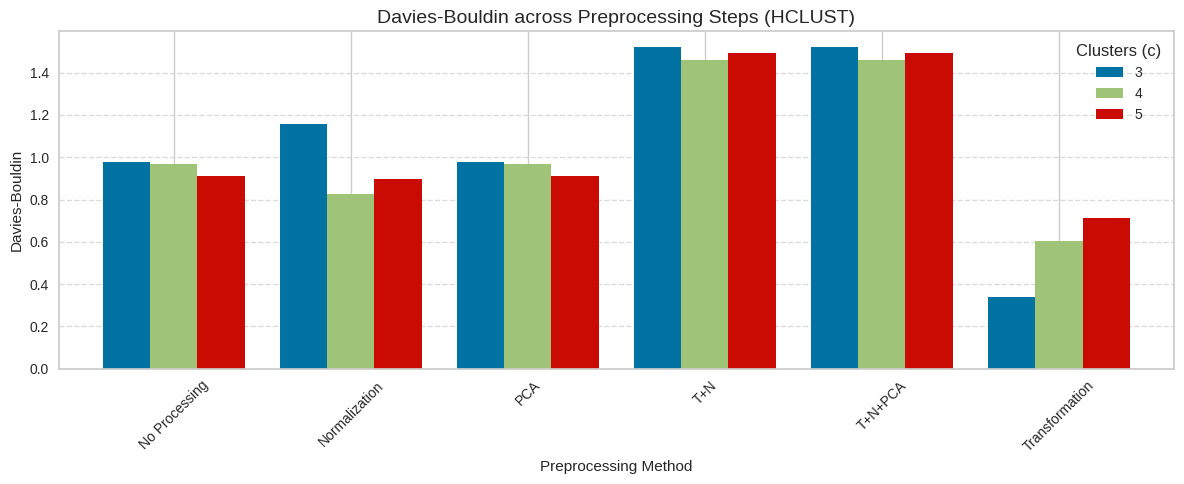

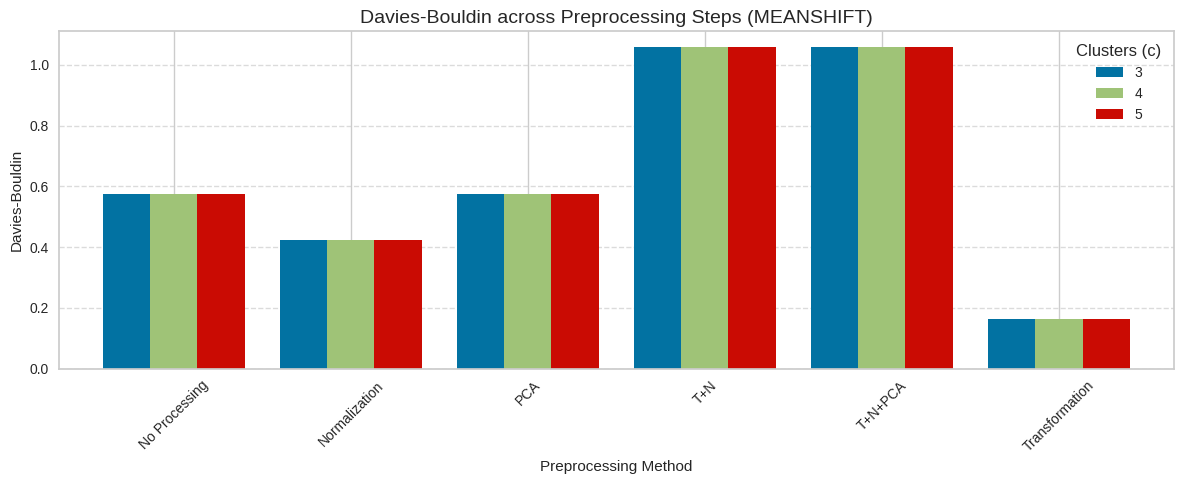

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: convert values to float (in case any are 'NA' strings)
results_df_clean = results_df[results_df['Silhouette'] != 'NA'].copy()
results_df_clean[['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']] = results_df_clean[
    ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']
].astype(float)

def plot_metric(metric_name):
    plt.figure(figsize=(14, 6))

    for model in results_df_clean['Model'].unique():
        subset = results_df_clean[results_df_clean['Model'] == model]
        pivoted = subset.pivot(index='Preprocessing', columns='Clusters', values=metric_name)
        pivoted = pivoted[[3, 4, 5]]  # Ensure order

        pivoted.plot(kind='bar', width=0.8, figsize=(12, 5))
        plt.title(f'{metric_name} across Preprocessing Steps ({model})', fontsize=14)
        plt.ylabel(metric_name)
        plt.xlabel("Preprocessing Method")
        plt.xticks(rotation=45)
        plt.legend(title="Clusters (c)")
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

# 📈 Generate all three plots
plot_metric('Silhouette')
plot_metric('Calinski-Harabasz')
plot_metric('Davies-Bouldin')


In [15]:
import matplotlib.pyplot as plt

def save_metric_plot(metric_name, file_prefix="clustering"):
    for model in results_df_clean['Model'].unique():
        subset = results_df_clean[results_df_clean['Model'] == model]
        pivoted = subset.pivot(index='Preprocessing', columns='Clusters', values=metric_name)
        pivoted = pivoted[[3, 4, 5]]  # Ensure c=3, c=4, c=5 order

        # Plot
        ax = pivoted.plot(kind='bar', width=0.8, figsize=(12, 5))
        plt.title(f'{metric_name} across Preprocessing Steps ({model})', fontsize=14)
        plt.ylabel(metric_name)
        plt.xlabel("Preprocessing Method")
        plt.xticks(rotation=45)
        plt.legend(title="Clusters (c)")
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # Save as image
        filename = f"{file_prefix}_{model}_{metric_name.replace(' ', '_')}.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"✅ Saved: {filename}")
        plt.close()

# Call the function for each metric
save_metric_plot('Silhouette')
save_metric_plot('Calinski-Harabasz')
save_metric_plot('Davies-Bouldin')


✅ Saved: clustering_KMEANS_Silhouette.png
✅ Saved: clustering_HCLUST_Silhouette.png
✅ Saved: clustering_MEANSHIFT_Silhouette.png
✅ Saved: clustering_KMEANS_Calinski-Harabasz.png
✅ Saved: clustering_HCLUST_Calinski-Harabasz.png
✅ Saved: clustering_MEANSHIFT_Calinski-Harabasz.png
✅ Saved: clustering_KMEANS_Davies-Bouldin.png
✅ Saved: clustering_HCLUST_Davies-Bouldin.png
✅ Saved: clustering_MEANSHIFT_Davies-Bouldin.png


In [13]:
import pandas as pd

# Step 1: Clean and prepare your results_df
df_clean = results_df[results_df['Silhouette'] != 'NA'].copy()
df_clean[['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']] = df_clean[
    ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']
].astype(float)

# Step 2: Function to generate the formatted table
def generate_clustering_table(model_name):
    model_df = df_clean[df_clean['Model'] == model_name.upper()]

    silhouette = model_df.pivot(index='Preprocessing', columns='Clusters', values='Silhouette').round(4)
    ch_score = model_df.pivot(index='Preprocessing', columns='Clusters', values='Calinski-Harabasz').round(2)
    db_score = model_df.pivot(index='Preprocessing', columns='Clusters', values='Davies-Bouldin').round(4)

    # Vertical stacking in the same format as LaTeX screenshot
    silhouette.insert(0, "Metric", silhouette.index)
    ch_score.insert(0, "Metric", ch_score.index)
    db_score.insert(0, "Metric", db_score.index)

    table = pd.concat([
        pd.DataFrame([["Silhouette", "", "", "", ""]], columns=["Metric", 3, 4, 5, "dummy"]),
        silhouette.reset_index(drop=True),
        pd.DataFrame([["Calinski-Harabasz", "", "", "", ""]], columns=["Metric", 3, 4, 5, "dummy"]),
        ch_score.reset_index(drop=True),
        pd.DataFrame([["Davies-Bouldin", "", "", "", ""]], columns=["Metric", 3, 4, 5, "dummy"]),
        db_score.reset_index(drop=True)
    ], ignore_index=True).drop(columns="dummy")

    return table

# Step 3: Generate tables
kmeans_table = generate_clustering_table("KMEANS")
hclust_table = generate_clustering_table("HCLUST")
meanshift_table = generate_clustering_table("MEANSHIFT")

# Step 4: Display in Colab
print("\n📊 K-MEANS CLUSTERING TABLE")
display(kmeans_table)

print("\n📊 HIERARCHICAL CLUSTERING TABLE")
display(hclust_table)

print("\n📊 MEANSHIFT CLUSTERING TABLE")
display(meanshift_table)



📊 K-MEANS CLUSTERING TABLE


,Metric,3,4,5
0,Silhouette,,,
1,No Processing,0.4563,0.3617,0.3224
2,Normalization,0.3063,0.3166,0.3158
3,PCA,0.4563,0.3617,0.3224
4,T+N,0.2477,0.2168,0.2135
5,T+N+PCA,0.2477,0.2168,0.2135
6,Transformation,0.8554,0.5181,0.4728
7,Calinski-Harabasz,,,
8,No Processing,207.98,194.87,169.14
9,Normalization,116.7,117.79,117.31



📊 HIERARCHICAL CLUSTERING TABLE


,Metric,3,4,5
0,Silhouette,,,
1,No Processing,0.375,0.3483,0.3522
2,Normalization,0.36,0.3623,0.3178
3,PCA,0.375,0.3483,0.3522
4,T+N,0.2288,0.2425,0.2073
5,T+N+PCA,0.2288,0.2425,0.2073
6,Transformation,0.8554,0.5109,0.453
7,Calinski-Harabasz,,,
8,No Processing,183.36,185.26,196.95
9,Normalization,126.25,120.76,123.51



📊 MEANSHIFT CLUSTERING TABLE


,Metric,3,4,5
0,Silhouette,,,
1,No Processing,0.3644,0.3644,0.3644
2,Normalization,0.4054,0.4054,0.4054
3,PCA,0.3644,0.3644,0.3644
4,T+N,0.3461,0.3461,0.3461
5,T+N+PCA,0.3461,0.3461,0.3461
6,Transformation,0.9076,0.9076,0.9076
7,Calinski-Harabasz,,,
8,No Processing,54.75,54.75,54.75
9,Normalization,30.86,30.86,30.86
